<a href="https://colab.research.google.com/github/Matheus0820/pesquisa_machine_leaning_e_materiais/blob/main/Etapa_1/Algoritmos_Matheus/desafio_gabarito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importações

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time

### Criando dataframe

Data frame do dados:
  Ponto  x  y
0     A  1  2
1     B  2  1
2     C  1  1
3     D  8  8
4     E  9  8
5     F  8  9
6     G  4  5
7     H  5  4
8     I  5  5

Plotagem de pontos em um gráfico


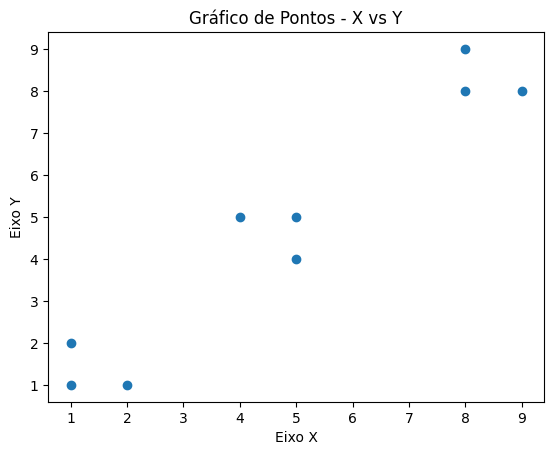

In [ ]:
dados = {
    'Ponto': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'x':     [1,   2,   1,   8,   9,   8,   4,   5,   5],
    'y':     [2,   1,   1,   8,   8,   9,   5,   4,   5]
}

df = pd.DataFrame(dados)
print("Data frame do dados:")
print(df)

print("\nPlotagem de pontos em um gráfico")
plt.scatter(df['x'], df['y'])
plt.title('Gráfico de Pontos - X vs Y')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()

### Distância euclidiana

In [ ]:
# Iniciando a matriz
n = len(df)
matrix_dist = np.zeros((n, n)) # É uma matriz quadrada, ou seja, ela relaciona n elementos com n elementos
print("Matriz de zeros:")
print(matrix_dist)

# Calculando as distâncias entre um ponto i até um ponto j
for i in range(n):
  for j in range(n):
    matrix_dist[i][j] = np.sqrt((df['x'][i] - df['x'][j])**2 + (df['y'][i] - df['x'][j])**2)

print("\nMatriz de distâncias:")
print(matrix_dist)

Matriz de zeros:
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Matriz de distâncias:
[[ 1.          1.          1.          9.21954446 10.63014581  9.21954446
   3.60555128  5.          5.        ]
 [ 1.          1.          1.          9.21954446 10.63014581  9.21954446
   3.60555128  5.          5.        ]
 [ 0.          1.41421356  0.          9.89949494 11.3137085   9.89949494
   4.24264069  5.65685425  5.65685425]
 [ 9.89949494  8.48528137  9.89949494  0.          1.41421356  0.
   5.65685425  4.24264069  4.24264069]
 [10.63014581  9.21954446 10.63014581  1.          1.          1.
   6.40312424  5.          5.        ]
 [10.63014581  9.21954446 10.63014581  1.          1.          1.
   6.40312424  5.          5.        ]
 [ 5.          3.60555128  5.      

### Desenvolvimento pricipal do algoritmo

In [ ]:
# Centroides
centroides = np.zeros((3, 2)) # São 3 centroides de 2 dimensões (x, y)

# Arrays de cluteres - Guarda as posições dos pontos as quais o pertence
cluster_1 = []
cluster_2 = []
cluster_3 = []


for i in range(3):
  for j in range(2):
    random.seed(time.time())
    centroides[i][j] = random.randint(0, 10) # Defini coordenadas aleatórias para cada coordenada do centroide entre 0 e 10

print("Centroides:")
print(centroides)

# Recalculando centroides até que não haja uma mudança significativa
interacoes_maximas = 100
contador_interacoes = 0
while True:
  # zerando os clusteres
  cluster_1 = []
  cluster_2 = []
  cluster_3 = []

  # Matriz distância de um centroide i a um ponto j
  matrix_dist_centroides = np.zeros((3, n)) # São 3 centroides
  for i in range(3):
    for j in range(n):
      matrix_dist_centroides[i][j] = np.sqrt((centroides[i][0] - df['x'][j])**2 + (centroides[i][1] - df['y'][j])**2)


  # Definindo cluster que cada ponto pertence
  for i in range(n):
    if matrix_dist_centroides[0][i] < matrix_dist_centroides[1][i] and matrix_dist_centroides[0][i] < matrix_dist_centroides[2][i]:
      cluster_1.append(i)
    elif matrix_dist_centroides[1][i] < matrix_dist_centroides[0][i] and matrix_dist_centroides[1][i] < matrix_dist_centroides[2][i]:
      cluster_2.append(i)
    elif matrix_dist_centroides[2][i] < matrix_dist_centroides[0][i] and matrix_dist_centroides[2][i] < matrix_dist_centroides[1][i]:
      cluster_3.append(i)

  centroides_antigos = centroides.copy()
  # Recalculando centroides
  for i in range(3):
    for j in range(2):
      centroides[i][j] = np.mean([df['x'][k] for k in eval(f'cluster_{i+1}')])

  # Calculando se há diferença entre os centroides e verificando a quantidade de interações
  contador_interacoes += 1
  if np.allclose(centroides, centroides_antigos) or contador_interacoes >= interacoes_maximas:
    break


print("Centroides")
print(centroides)

Centroides:
[[7. 4.]
 [7. 9.]
 [6. 6.]]
Centroides
[[1.33333333 1.33333333]
 [8.33333333 8.33333333]
 [4.66666667 4.66666667]]


### Plotando Clusters e centroides

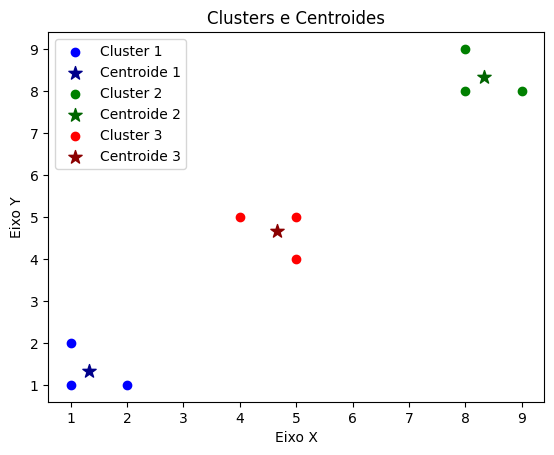

In [ ]:
# Plotando centroide e Cluters

# Cluster 1 e Centroide 1
plt.scatter(df['x'][cluster_1], df['y'][cluster_1], color='blue', label='Cluster 1')
plt.scatter(centroides[0][0], centroides[0][1], color='darkblue', marker='*', s=100, label='Centroide 1')

# Cluster 2 e Centroide 2
plt.scatter(df['x'][cluster_2], df['y'][cluster_2], color='green', label='Cluster 2')
plt.scatter(centroides[1][0], centroides[1][1], color='darkgreen', marker='*', s=100, label='Centroide 2')

# Cluster 3 e Centroide 3
plt.scatter(df['x'][cluster_3], df['y'][cluster_3], color='red', label='Cluster 3')
plt.scatter(centroides[2][0], centroides[2][1], color='darkred', marker='*', s=100, label='Centroide 3')

plt.title('Clusters e Centroides')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.legend()
plt.show()
